# Task 3

In [1]:
#Loading libraries
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout2D, BatchNormalization, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adagrad, SGD, RMSprop

In [2]:
# Loading the data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Train split to validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
# Normalizing the data
x_train = x_train.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One - Hot - Key Coding
N = 10
y_train = to_categorical(y_train, N)
y_valid = to_categorical(y_valid, N)
y_test = to_categorical(y_test, N)

In [3]:
# Defining Nureal Network Model
def Model():
    model = Sequential()  
    model.add(Conv2D(64, kernel_size=(5,5), strides = 1, padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(rate=0.2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
    

    model.add(Conv2D(192, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(rate=0.2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Conv2D(384, kernel_size=(3,3), strides = 1, padding='same'))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(rate=0.2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
    model.add(Activation('relu'))
        
    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(rate=0.2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Flatten())
    
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.5))
              
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.5))         
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [5]:
# Training of Model
optimizers = ['sgd', 'adagrad']
batch_dic = {}
score_dic = {}

# Model Instances 
sgd     = SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
adagrad = Adagrad(learning_rate=0.01)
rmsprop = RMSprop(learning_rate=0.01)
model = []
for i in range(len(optimizers)):
  model.append(Model())
  model[i].compile(loss='categorical_crossentropy', optimizer = optimizers[i], metrics=['accuracy'])

In [ ]:
epochs = 150
for idx, val in enumerate(optimizers):
  batch_dic[val] = model[idx].fit(x_train, y_train, batch_size = 32, epochs=epochs, validation_data=(x_valid, y_valid))
  score_dic[val] = model[idx].evaluate(x_test, y_test, verbose=0)

 922/1250 [=====================>........] - ETA: 5:26 - loss: 2.3291 - accuracy: 0.2640

In [9]:
!pip install xlsxwriter

     |████████████████████████████████| 148 kB 13.9 MB/s 


<Figure size 432x288 with 0 Axes>

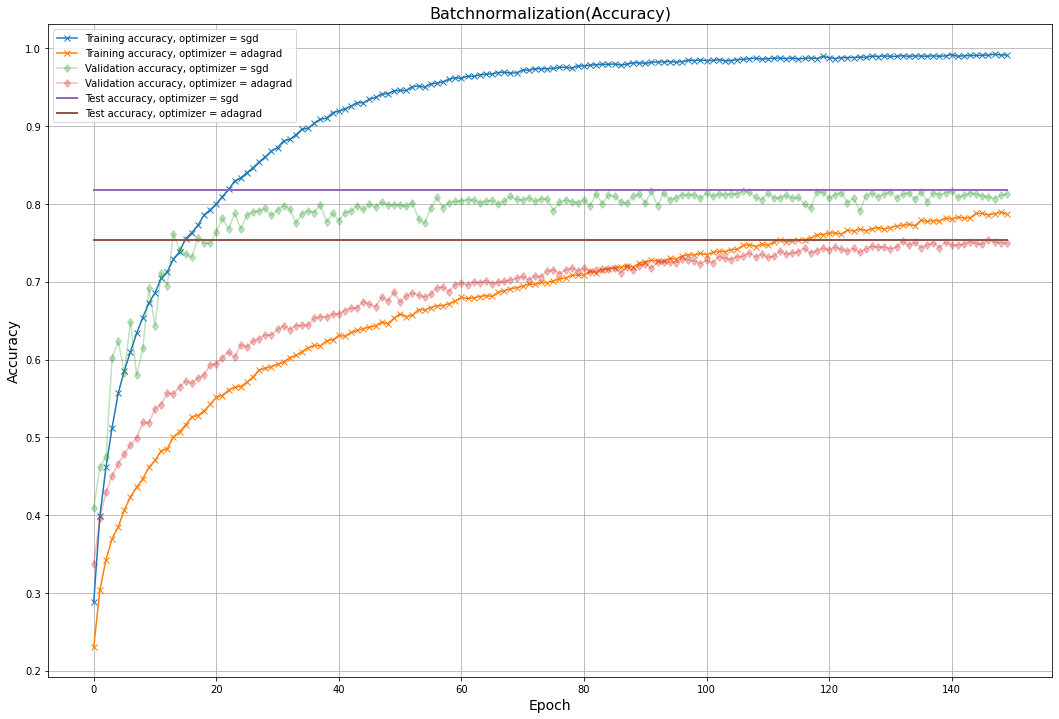

<Figure size 432x288 with 0 Axes>

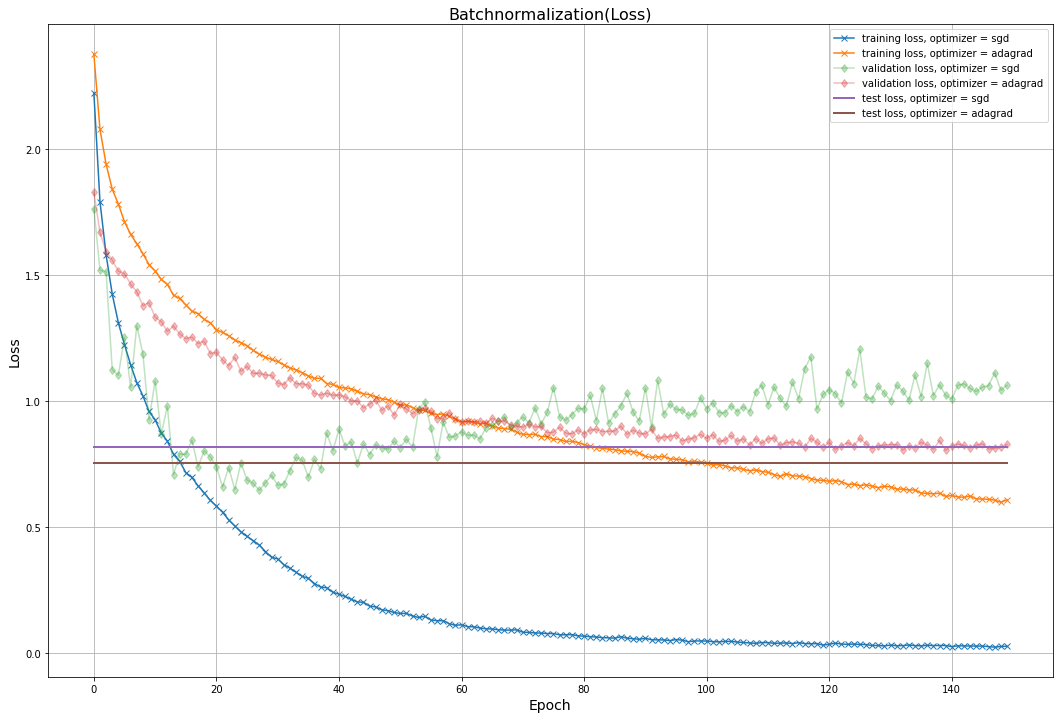

In [10]:
modelName = 'Batchnormalization'

# Plotting the graph and saving the data
plt.figure(1)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(batch_dic):
  plt.plot(batch_dic[val].history['accuracy'], marker = 'x', label='Training accuracy, optimizer = {batch}'.format(batch = val))
for idx, val in enumerate(batch_dic):  
  plt.plot(batch_dic[val].history['val_accuracy'], marker = "d", alpha = 0.3, label='Validation accuracy, optimizer = {batch}'.format(batch = val))
for idx, val in enumerate(batch_dic):
  plt.plot(np.ones((epochs,1)) * score_dic[val][1], linewidth = 2, label = 'Test accuracy, optimizer = {batch}'.format(batch = val))

plt.title('{modelName}(Accuracy)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Accuracy).png'.format(modelName = modelName))
plt.show()


plt.figure(2)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(batch_dic):
  plt.plot(batch_dic[val].history['loss'], marker='x', label='training loss, optimizer = {batch}'.format(batch = val))

for idx, val in enumerate(batch_dic):
  plt.plot(batch_dic[val].history['val_loss'], marker='d', alpha = 0.3, label='validation loss, optimizer = {batch}'.format(batch = val))

for idx, val in enumerate(batch_dic):
  plt.plot(np.ones((epochs,1)) * score_dic[val][1], linewidth = 2, label = 'test loss, optimizer = {batch}'.format(batch = val))



plt.title('{modelName}(Loss)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Loss).png'.format(modelName = modelName))
plt.show()


#-------------------------------------------Saving records-------------------------------------------
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('{}.xlsx'.format(modelName), engine='xlsxwriter')
df = pd.DataFrame(batch_dic['sgd'].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
df['Optimizer'] = 'sgd'

temp = pd.DataFrame(batch_dic['adagrad'].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
temp['Optimizer'] = 'adagrad'
df = df.append(temp)

 
df.to_excel(writer, sheet_name = 'Records')

#--------------------------------------------Saving scores----------------------------------------------
df_score = pd.DataFrame(score_dic['sgd'])
df_score = df_score.T
df_score['Optimizer'] = 'sgd'

temp = pd.DataFrame(score_dic['adagrad'])
temp = temp.T
temp['Optimizer'] = 'adagrad'
df_score = df_score.append(temp)
 
df_score = df_score.append(temp)



df_score.rename(columns={0: "Loss", 1: "Accuracy"}, inplace=True)
df_score.to_excel(writer, sheet_name = 'Scores')


# Close the Pandas Excel writer and output the Excel file.
writer.save()
